In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('alturas-pesos-train.csv')

In [3]:
df[:10]

,Genero,Peso,Altura
0,Mujer,60,160
1,Hombre,95,180
2,Hombre,75,170
3,Mujer,55,160
4,Mujer,55,150
5,Mujer,60,160
6,Hombre,80,175
7,Mujer,70,170
8,Mujer,55,155
9,Hombre,85,180


In [4]:
len(df)

8000

# Modelos en Machine Learning
- Generación
- Clasificación
- Regresión

# Tenemos 3 V.A: Género, Peso, Altura

## Género: V.A de Bernoulli

In [5]:
genero = df['Genero']
print(genero)

0        Mujer
1       Hombre
2       Hombre
3        Mujer
4        Mujer
         ...  
7995     Mujer
7996    Hombre
7997    Hombre
7998     Mujer
7999    Hombre
Name: Genero, Length: 8000, dtype: object


### Cual es el parámetro p?

In [6]:
p_hombre = (genero == 'Hombre').sum()/len(genero)
p_mujer = (genero == 'Mujer').sum()/len(genero)
print(p_hombre, p_mujer)

0.50025 0.49975


In [7]:
from matplotlib import pyplot as plt

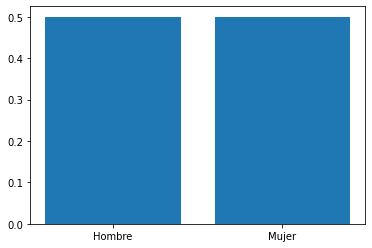

In [8]:
plt.bar(['Hombre', 'Mujer'], [0.50025, 0.49975])
plt.show()

Espacio muestral:

In [32]:
['Hombre', 'Mujer']

['Hombre', 'Mujer']

## Peso: V.A categórica

In [9]:
from collections import Counter

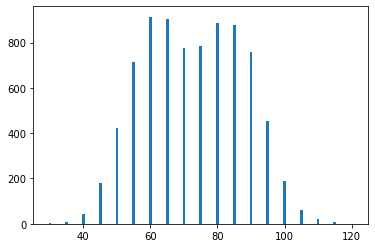

In [10]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
plt.bar(peso_frecuencia.keys(), peso_frecuencia.values())
plt.show()

In [11]:
print(peso_frecuencia)

{60: 914, 95: 452, 75: 786, 55: 712, 80: 887, 70: 777, 85: 877, 65: 903, 40: 45, 50: 421, 90: 757, 30: 2, 45: 180, 110: 20, 100: 189, 105: 62, 35: 7, 115: 8, 120: 1}


In [36]:
peso_frecuencia[65]

903

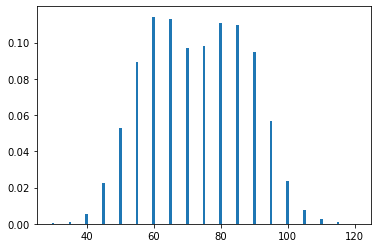

In [13]:
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

In [14]:
print(peso_prob)

{60: 0.11425, 95: 0.0565, 75: 0.09825, 55: 0.089, 80: 0.110875, 70: 0.097125, 85: 0.109625, 65: 0.112875, 40: 0.005625, 50: 0.052625, 90: 0.094625, 30: 0.00025, 45: 0.0225, 110: 0.0025, 100: 0.023625, 105: 0.00775, 35: 0.000875, 115: 0.001, 120: 0.000125}


In [15]:
peso_prob[65]

0.112875

Espacio Muestral:

In [16]:
np.sort(list(peso_prob.keys()))

array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120])

## Altura: V.A categórica

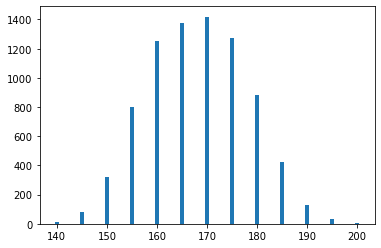

In [17]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
plt.bar(altura_frecuencia.keys(), altura_frecuencia.values())
plt.show()

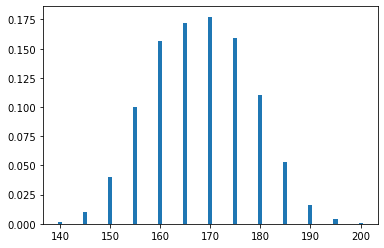

In [18]:
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

In [43]:
print(altura_prob)

{160: 0.15625, 180: 0.110125, 170: 0.177375, 150: 0.04025, 175: 0.15925, 155: 0.10025, 165: 0.172125, 185: 0.052625, 145: 0.009875, 195: 0.003875, 190: 0.016125, 200: 0.000625, 140: 0.00125}


In [44]:
altura_prob[170]

0.177375

Espacio muestral

In [19]:
np.sort(list(altura_frecuencia.keys()))

array([140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

# V.A Marginales
Cada V.A independiente de los valores que toman las otras

# Modelos generadores:

In [20]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 100, p = list(peso_prob.values()))
print(peso_gen)

[ 55  75  75  90  80 100  90  75  60  75  70  60  80  75  65  80  50  65
  95  65  85  60  60  85  55  85  85  85  60  50  50  85  70  60  60  55
  85  60  75  80  55 105  75  60  50  65  65  65  60  90  70  75  95  70
  65  60  85  95  75  65  85  85  65  65  85  60  55  70  65  95  80  50
  95  70  75  60  45  80  65  85  70  90  55  45  90  75  75  80  80  75
  50  50  85  65  60  85  85  60  60  95]


In [21]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 100, p = list(altura_prob.values()))
print(alt_gen)

[175 155 170 175 180 175 155 165 165 165 180 165 170 175 165 160 170 175
 160 160 170 185 180 165 190 170 165 170 175 180 170 180 180 170 170 175
 180 160 180 165 175 170 180 165 175 170 170 180 160 175 160 165 160 155
 170 170 165 155 170 175 165 165 165 175 155 175 170 180 165 150 165 160
 175 160 155 150 155 165 170 155 175 175 155 180 165 165 170 180 165 160
 155 175 175 180 170 165 155 175 175 160]


### Tiene sentido ahora armar conjunto de pesos, alturas generando de esta forma? Son independientes?

# Asi se generaron los pesos y alturas con baja precisión
No hace falta correr estas celdas

In [22]:
ap = pd.read_csv('alturas-pesos-mils-train.csv')

In [23]:
pesos_rounded = (np.round(ap['Peso'].values/5)*5).astype(int)
alturas_rounded = (np.round(ap['Altura'].values/5)*5).astype(int)

In [24]:
alturas_rounded

array([160, 180, 170, ..., 170, 165, 170])

In [25]:
ap_rounded = ap.copy()

In [26]:
ap_rounded['Peso'] = pesos_rounded
ap_rounded['Altura'] = alturas_rounded

In [27]:
ap_final = ap_rounded[['Genero','Peso', 'Altura']].copy()

In [28]:
ap_final.to_csv('alturas-pesos-train.csv',index=False)